We want to study the equation of the type
$$
\dot{x} = f(x) - f(x(t-1))
$$
for different $f$'s. For this denote $x_j(t)$ the part of the solution on the corresponding interval $[j-1,j]$ (with $t$ going from $0$ to $1$). In this case the overall solution is presented by an operator on the space of functions on the segment $[0,1]$, taking $x_{j-1}$, and providing $x_j$.

In [1]:
%pylab inline
#from scipy.integrate import ode
#from scipy.interpolate import interp1d
from dde_state import DDE_state
dde = DDE_state()

Populating the interactive namespace from numpy and matplotlib


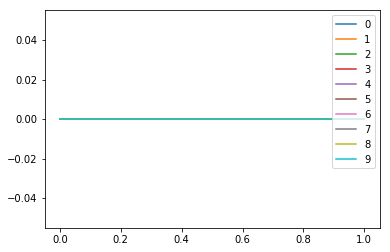

In [2]:
Nmax = 10
ts = linspace(0,1,100)
x0s = 0*ts
xs = dde.evolve_n(ts,x0s,Nmax)
for i in arange(10):
    plot(ts,xs[i],label=i)
plt.legend()
plt.show()

In [3]:
def eigen_eq(z,p):
    return z-p*(1-exp(-z))

In [4]:
xs = linspace(-5,2,600)
ys = linspace(-20,20,600)

XS,YS = meshgrid(xs,ys)

P=2
ZS = eigen_eq(XS+1j*YS,P)

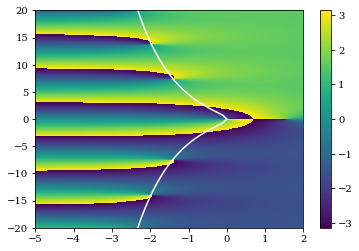

In [7]:
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.bf'] = 'serif:bold'

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.style'] = 'normal'
pcolormesh(XS,YS,angle(ZS))

xs2= linspace(-5,0)
eig_f = P*sqrt(exp(-2*xs2)-(xs2/P-1)**2)
plot(xs2,eig_f,color='w')
plot(xs2,-eig_f,color='w')
ylim([ys[0],ys[-1]])
#clim(0,1)
colorbar()

#plt.savefig('eigenvals.png')

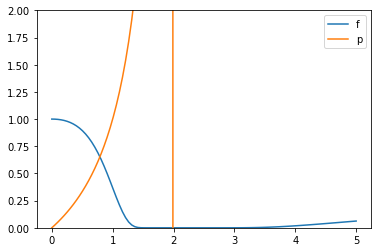

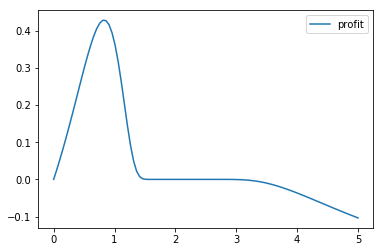

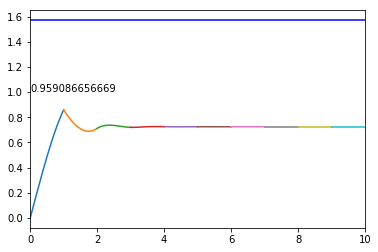

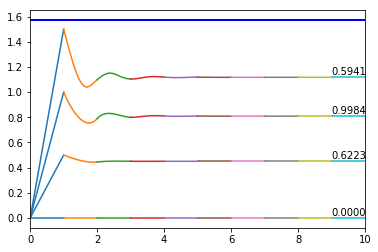

In [10]:
def N(p):
    return exp(-p**2)

A = 1
def p0(x):
    return A*x/(2.-x)

def p1(x):
    return A*tan(x) if x <pi/2 else NaN
dde.set_price_function(p0)
dde.set_spending_ability(N)

Nmax = 10
xs = linspace(0,5,100)
plot(xs,dde.f(xs),label='f')
plot(xs,dde.p(xs),label='p')
ylim([0,2.])
plt.legend()
plt.show()

plot(xs,dde.p(xs)*dde.f(xs),label='profit')
plt.legend()
plt.show()



ts = linspace(0,1,100)
xs = dde.consistent_evolve(ts,Nmax)
max_profit=amax(dde.p(xs)*dde.f(xs))
for i in arange(Nmax):
    plot(ts+i,xs[i])
hlines([pi/2],0,Nmax,colors='b')
xlim([0,Nmax])
plt.text(0,1.,dde.f(xs[-1][-1])*dde.p(xs[-1][-1])/max_profit)
plt.show()



for K in [0,0.5,1.,1.5]:
    x0s = K*ts
    xs = dde.evolve_n(ts,x0s,Nmax)
    for i in arange(Nmax):
        plot(ts+i,xs[i],label=i)
    hlines([pi/2],0,Nmax,colors='b')
    xlim([0,Nmax])
    plt.text(Nmax-1,xs[-1][-1]+0.02,'%.4f' % (dde.f(xs[-1][-1])*dde.p(xs[-1][-1])/max_profit))
plt.show()

In [7]:
Nmax = 10

tostore_pricing = [[x,dde.p(x),dde.f(x),dde.p(x)*dde.f(x)] for x in linspace(0,3)]
tostore_spending = [[x,dde.N(x)] for x in linspace(0,2)]
tostore_xs = [array(list(flatten(ts+i for i in arange(Nmax+1))))]
ts = linspace(0,1,100)
for K in [0,0.5,1.,1.5]:
    x0s = K*ts
    xs = dde.evolve_n(ts,x0s,Nmax)
    tostore_xs.append(array(list(flatten(xs))))
xs = dde.consistent_evolve(ts,Nmax)
tostore_xs.append(array(list(flatten(xs))))
tostore_xs = array(tostore_xs).transpose()

In [42]:
#np.savetxt('xs_full.txt',tostore_xs)
#np.savetxt('ps_full.txt',tostore_pricing)
#np.savetxt('Ns_full.txt',tostore_spending)